In [ ]:
!pip3 install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 22.3 MB 2.0 MB/s 
     |████████████████████████████████| 4.4 MB 44.6 MB/s 
     |████████████████████████████████| 260 kB 35.3 MB/s 
     |████████████████████████████████| 4.3 MB 29.0 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=b35dfb4a5bc166a56ad468206c1ad8622e60e4ad28848c010f6c4391080d496b
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=1663d19cdfa9185f64d6f92ec254cd0aef10a1afd135db43877c58b29cd90beb
  Sto

In [ ]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import sklearn.metrics
import autosklearn.classification
import autosklearn.metrics
import time

#LOADING DATA

In [ ]:
TrainDataSet= load_breast_cancer()
df = pd.DataFrame(data=TrainDataSet.data, columns=TrainDataSet.feature_names)
df['target'] = TrainDataSet.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#EXPLORATORY DATA ANALYSIS OF BC

In [ ]:
fig = px.histogram(df, 
                   x='target',
                   color = 'target',
                   text_auto=True,
                   color_discrete_sequence=px.colors.qualitative.G10,
                   template='simple_white',
                   labels={"target": "Target"},
                   title='Target Value Count')

fig.update_layout(bargap=0.1, xaxis_title="Target",yaxis_title="Count")
fig.show()

#DATA CLEANING

In [ ]:
input_cols = df.columns[:-1]
input_cols


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
target_col =  df.columns[-1]
target_col

'target'

In [ ]:
inputs_df = df[list(input_cols)].copy()
inputs_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
targets = df[(target_col)]
targets

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

#AUTOML MODEL

In [ ]:
X = inputs_df
y = targets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state=1)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    max_models_on_disc=3,
    ensemble_kwargs = {'ensemble_size': 10},
    metric=[autosklearn.metrics.precision, autosklearn.metrics.recall],
    delete_tmp_folder_after_terminate=False,
)

In [ ]:
start = time.time()
history = automl.fit(X_train, y_train, dataset_name="Breast Cancer")
stop = time.time()
print(f"Training time: {stop - start}s")

Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autosklearn/ensemble_building/builder.py", line 576, in main
    random_state=self.random_state,
  File "/usr/local/lib/python3.7/dist-packages/autosklearn/ensemble_building/builder.py", line 926, in fit_ensemble
    ensemble = ensemble_class(**kwargs)  # type: AbstractEnsemble
TypeError: __init__() got an unexpected keyword argument 'ensemble_size'
Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
 

[WARNING] [2022-10-10 21:48:08,566:Client-autosklearn.automl_common.common.utils.backend] Directory /tmp/auto-sklearn_tmp_f5b80d70-48e4-11ed-8038-0242ac1c0002/.auto-sklearn/ensembles does not exist
[WARNING] [2022-10-10 21:48:08,569:Client-AutoML(1):Breast Cancer] No valid ensemble was created. Please check the logfile for errors. Default to the best individual estimator:(1, 7, 0.0)
RunKey(config_id=1, instance_id='{"task_id": "Breast Cancer"}', seed=0, budget=0.0) RunValue(cost=[0.01041666666666663, 0.0], time=1.9580073356628418, status=<StatusType.SUCCESS: 1>, starttime=1665438376.588997, endtime=1665438378.562713, additional_info={'duration': 1.8766069412231445, 'num_run': 2, 'train_loss': [0.0, 0.0], 'configuration_origin': 'Initial design'})
RunKey(config_id=2, instance_id='{"task_id": "Breast Cancer"}', seed=0, budget=0.0) RunValue(cost=[0.010526315789473717, 0.010526315789473717], time=1.3339357376098633, status=<StatusType.SUCCESS: 1>, starttime=1665438378.6414518, endtime=1665

#Evaluar red

In [ ]:
predictions = automl.predict(X_test)
print("Precision", sklearn.metrics.precision_score(y_test, predictions))
print("Recall", sklearn.metrics.recall_score(y_test, predictions))
print("Loss", sklearn.metrics.log_loss(y_test, predictions))

Precision 0.935064935064935
Recall 1.0
Loss 1.5148936838746005


In [ ]:
automl.show_models()

{7: {'model_id': 7,
  'rank': 1,
  'cost': [0.0, 0.04210526315789476],
  'ensemble_weight': 1.0,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f67f46957d0>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f67f46a4a50>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f67f4652910>,
  'sklearn_classifier': AdaBoostClassifier(algorithm='SAMME',
                     base_estimator=DecisionTreeClassifier(max_depth=4),
                     learning_rate=0.08969800736685585, n_estimators=477,
                     random_state=1)}}

In [30]:
automl.leaderboard()

,rank,ensemble_weight,type,cost_0,cost_1,duration
model_id,,,,,,
7,1,1.0,adaboost,0.0,0.042105,2.383395


In [38]:
df_cv_results = pd.DataFrame(automl.cv_results_).sort_values(by = 'rank_test_precision', ascending = True)
df_cv_results

,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall,mean_fit_time,params,status,budgets,param_balancing:strategy,param_classifier:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
28,1.000000,1,0.873684,31,0.904869,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,decision_tree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.000000,1,0.957895,26,2.383395,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,adaboost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1.000000,1,0.978947,20,2.359718,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,random_forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.989583,4,1.000000,1,1.958007,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.989583,4,1.000000,1,3.552993,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,random_forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.989583,4,1.000000,1,2.390459,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,random_forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,0.989583,4,1.000000,1,1.864479,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,mlp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.989583,4,1.000000,1,3.378319,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,extra_trees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fwe
8,0.989583,4,1.000000,1,1.162031,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,mlp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0.989583,4,1.000000,1,3.532683,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,extra_trees,...,0.730562,0.255960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Predecir nuevos resultados

In [ ]:
y_pred = automl.predict(X_test)
y_test = np.array(y_test)

for i in range(50):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  print("---------------------------------- ")


valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  1
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  1
valor

Curva de precision

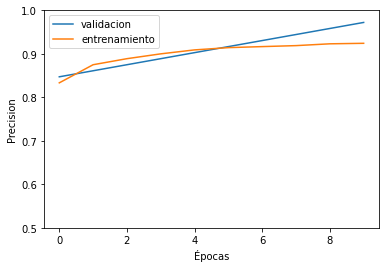

In [108]:
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve

y_score = automl.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
precisionOrdenado = sorted(precision, key = float)
recallOrdenado = sorted(recall, key = float)
del recallOrdenado[-1]
del recallOrdenado[-1]

#create precision recall curve
fig, ax = plt.subplots()
ax.set_ylim(bottom=0.5)
ax.plot(recallOrdenado[-10:], label='validacion')
ax.plot(precisionOrdenado[:10], label='entrenamiento')


#add axis labels to plot
ax.set_ylabel('Precision')
ax.set_xlabel('Épocas')
pyplot.legend()

#display plot
plt.show(fig)